# 09 Instructor Led Lab  

Author: Mark Lannen  
Course: BGEN632 Grad. Intro. to Python  
Term: Spring 2025

## Prep Data and Add A New Record

In [11]:
# Merge the two data files. Remove the following columns of data:
# * `Work_ID`
# * `PositionID`
# * `Website`

import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts # for QQ plot
from scipy.stats import pearsonr # correlation p-values
from sklearn.linear_model import LinearRegression # regression output
import statsmodels.formula.api as smf # ols regression

#Set working directory and load the data
os.chdir("/Users/markl1/Documents/Studies/Grad_School-MBA/Spring_2025/Python/week9labs/data")

#import both files. Add sep='\t' as I wasn't able to merge w/o it.
hospital_data = pd.read_csv('CaliforniaHospitalData.csv')
personnel_data = pd.read_csv('CaliforniaHospitalData_Personnel.txt', sep='\t')

#check columns as I was getting a key error
print(hospital_data.columns)
print(personnel_data.columns)

# hospital_data, personnel_data

# merge two tables on HospitalID key
merged_data = pd.merge(hospital_data, personnel_data, on='HospitalID')

# drop specified columns
merged_data = merged_data.drop(columns=['Work_ID', 'PositionID', 'Website'])
merged_data

Index(['HospitalID', 'Name', 'Zip', 'Website', 'TypeControl', 'Teaching',
       'DonorType', 'NoFTE', 'NetPatRev', 'InOperExp', 'OutOperExp', 'OperRev',
       'OperInc', 'AvlBeds'],
      dtype='object')
Index(['HospitalID', 'Work_ID', 'LastName', 'FirstName', 'Gender',
       'PositionID', 'PositionTitle', 'Compensation', 'MaxTerm', 'StartDate',
       'Phone', 'Email'],
      dtype='object')


,HospitalID,Name,Zip,TypeControl,Teaching,DonorType,NoFTE,NetPatRev,InOperExp,OutOperExp,...,AvlBeds,LastName,FirstName,Gender,PositionTitle,Compensation,MaxTerm,StartDate,Phone,Email
0,45740,Mammoth Hospital,93546-0660,District,Small/Rural,Charity,327.0,1.355202e+05,2.052343e+07,3.491622e+07,...,15,Web,David,M,Safety Inspection Member,23987,2,1/1/2012,785-532-2452,david.web@comenitymed.com
1,12145,Victor Valley Community Hospital,92392,Non Profit,Small/Rural,Charity,345.0,1.361567e+05,3.344754e+07,2.034860e+07,...,99,Rodriguez,Jose,M,Regional Representative,46978,4,1/1/2009,405-744-2238,jose.rodriguez@edihealth.com
2,25667,Pioneers Memorial Hospital,92227,District,Small/Rural,Charity,601.2,1.970943e+05,3.725418e+07,3.783245e+07,...,107,Adamson,David,M,Regional Representative,46978,4,1/1/2012,785-532-7573,david.adamson@txbiomed.net
3,46996,Ridgecrest Regional Hospital,93555,Non Profit,Small/Rural,Charity,400.0,1.391704e+05,2.338557e+07,2.466136e+07,...,55,Roberts,Melissa,F,Safety Inspection Member,23987,2,1/1/2009,785-532-9779,melissa.roberts@txbiomed.net
4,37393,Barstow Community Hospital,92311,Investor,Small/Rural,Charity,262.0,1.167978e+05,1.368450e+07,1.515999e+07,...,42,Iwata,Akira,M,Regional Representative,46978,4,1/1/2011,801-611-9161,akira.iwata@hsu.edu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,32930,Scripps Mercy Hospital,92103,Non Profit,Teaching,Alumni,2814.0,1.321032e+06,3.791029e+08,1.064302e+08,...,530,Manin,Emily,F,Regional Representative,46978,4,1/1/2011,801-223-6845,emily.manin@ihc.com
57,31032,Long Beach Memorial & Miller Children's Hospital,90806,Non Profit,Teaching,Alumni,5218.0,1.187022e+06,2.912481e+08,1.093286e+08,...,462,Dong,HongWei,F,Safety Inspection Member,23987,2,1/1/2012,479-354-4864,hongwei.dong@brokenhealth.com
58,22460,Stanford Hospital & Clinics,94305,Non Profit,Teaching,Alumni,6392.0,4.333934e+06,9.289621e+08,6.621559e+08,...,445,Smith,Mary,F,Safety Inspection Member,23987,2,1/1/2012,469-767-5485,mary.smith@ihc.com
59,33192,California Pacific Medical Center - Pacific Ca...,94115,Non Profit,Teaching,Alumni,1565.1,2.736281e+06,6.337903e+08,2.960207e+08,...,730,Fourier,Craig,M,Regional Representative,46978,4,1/1/2011,503-235-4877,craig.fourier@comenitymed.com


### Create a new position for myself

In [12]:

my_new_position = pd.DataFrame([{
    'HospitalID': 66600,  
    'Name': 'Example Hospital', 
    'Zip': 98765,
    'TypeControl': 'Government',
    'Teaching': 'No',
    'DonorType': 'Community',
    'NoFTE': 150,
    'NetPatRev': 50000000,
    'InOperExp': 7778880,
    'OutOperExp': 1234567,
    'OperRev': 9876543,
    'OperInc': 6785429,
    'AvlBeds': 301,
    'FirstName': 'Mark',
    'LastName': 'Lannen',
    'Gender': 'M',
    'PositionTitle': 'Lord High Commander',
    'Compensation': 1200000,
    'MaxTerm': 15,
    'StartDate': pd.to_datetime('2025-04-22'),
    'Work_ID': 10001,
    'PositionID': 666,
    'Phone': '123-456-7890',
    'Email': 'mark.lannen@imphealth.com'
}])

merged_data = pd.concat([merged_data, my_new_position], ignore_index=True)
merged_data

,HospitalID,Name,Zip,TypeControl,Teaching,DonorType,NoFTE,NetPatRev,InOperExp,OutOperExp,...,FirstName,Gender,PositionTitle,Compensation,MaxTerm,StartDate,Phone,Email,Work_ID,PositionID
0,45740,Mammoth Hospital,93546-0660,District,Small/Rural,Charity,327.0,1.355202e+05,2.052343e+07,3.491622e+07,...,David,M,Safety Inspection Member,23987,2,1/1/2012,785-532-2452,david.web@comenitymed.com,NaN,NaN
1,12145,Victor Valley Community Hospital,92392,Non Profit,Small/Rural,Charity,345.0,1.361567e+05,3.344754e+07,2.034860e+07,...,Jose,M,Regional Representative,46978,4,1/1/2009,405-744-2238,jose.rodriguez@edihealth.com,NaN,NaN
2,25667,Pioneers Memorial Hospital,92227,District,Small/Rural,Charity,601.2,1.970943e+05,3.725418e+07,3.783245e+07,...,David,M,Regional Representative,46978,4,1/1/2012,785-532-7573,david.adamson@txbiomed.net,NaN,NaN
3,46996,Ridgecrest Regional Hospital,93555,Non Profit,Small/Rural,Charity,400.0,1.391704e+05,2.338557e+07,2.466136e+07,...,Melissa,F,Safety Inspection Member,23987,2,1/1/2009,785-532-9779,melissa.roberts@txbiomed.net,NaN,NaN
4,37393,Barstow Community Hospital,92311,Investor,Small/Rural,Charity,262.0,1.167978e+05,1.368450e+07,1.515999e+07,...,Akira,M,Regional Representative,46978,4,1/1/2011,801-611-9161,akira.iwata@hsu.edu,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,31032,Long Beach Memorial & Miller Children's Hospital,90806,Non Profit,Teaching,Alumni,5218.0,1.187022e+06,2.912481e+08,1.093286e+08,...,HongWei,F,Safety Inspection Member,23987,2,1/1/2012,479-354-4864,hongwei.dong@brokenhealth.com,NaN,NaN
58,22460,Stanford Hospital & Clinics,94305,Non Profit,Teaching,Alumni,6392.0,4.333934e+06,9.289621e+08,6.621559e+08,...,Mary,F,Safety Inspection Member,23987,2,1/1/2012,469-767-5485,mary.smith@ihc.com,NaN,NaN
59,33192,California Pacific Medical Center - Pacific Ca...,94115,Non Profit,Teaching,Alumni,1565.1,2.736281e+06,6.337903e+08,2.960207e+08,...,Craig,M,Regional Representative,46978,4,1/1/2011,503-235-4877,craig.fourier@comenitymed.com,NaN,NaN
60,38900,Cedars-Sinai Medical Center,90048,Non Profit,Teaching,Alumni,8000.0,4.662582e+06,1.285631e+09,4.616758e+08,...,Kaaluai,M,Regional Representative,46978,4,1/1/2011,479-684-1883,kaaluai.paanua@brokenhealth.com,NaN,NaN


### Convert Data Types

In [13]:
# Convert StartDate column to datetime
merged_data['StartDate'] = pd.to_datetime(merged_data['StartDate'])

# Convert object data to categorical data type
columns_to_convert = ['TypeControl', 'Teaching', 'DonorType', 'Gender']
for col in columns_to_convert:
    merged_data[col] = merged_data[col].astype('category')

merged_data

,HospitalID,Name,Zip,TypeControl,Teaching,DonorType,NoFTE,NetPatRev,InOperExp,OutOperExp,...,FirstName,Gender,PositionTitle,Compensation,MaxTerm,StartDate,Phone,Email,Work_ID,PositionID
0,45740,Mammoth Hospital,93546-0660,District,Small/Rural,Charity,327.0,1.355202e+05,2.052343e+07,3.491622e+07,...,David,M,Safety Inspection Member,23987,2,2012-01-01,785-532-2452,david.web@comenitymed.com,NaN,NaN
1,12145,Victor Valley Community Hospital,92392,Non Profit,Small/Rural,Charity,345.0,1.361567e+05,3.344754e+07,2.034860e+07,...,Jose,M,Regional Representative,46978,4,2009-01-01,405-744-2238,jose.rodriguez@edihealth.com,NaN,NaN
2,25667,Pioneers Memorial Hospital,92227,District,Small/Rural,Charity,601.2,1.970943e+05,3.725418e+07,3.783245e+07,...,David,M,Regional Representative,46978,4,2012-01-01,785-532-7573,david.adamson@txbiomed.net,NaN,NaN
3,46996,Ridgecrest Regional Hospital,93555,Non Profit,Small/Rural,Charity,400.0,1.391704e+05,2.338557e+07,2.466136e+07,...,Melissa,F,Safety Inspection Member,23987,2,2009-01-01,785-532-9779,melissa.roberts@txbiomed.net,NaN,NaN
4,37393,Barstow Community Hospital,92311,Investor,Small/Rural,Charity,262.0,1.167978e+05,1.368450e+07,1.515999e+07,...,Akira,M,Regional Representative,46978,4,2011-01-01,801-611-9161,akira.iwata@hsu.edu,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,31032,Long Beach Memorial & Miller Children's Hospital,90806,Non Profit,Teaching,Alumni,5218.0,1.187022e+06,2.912481e+08,1.093286e+08,...,HongWei,F,Safety Inspection Member,23987,2,2012-01-01,479-354-4864,hongwei.dong@brokenhealth.com,NaN,NaN
58,22460,Stanford Hospital & Clinics,94305,Non Profit,Teaching,Alumni,6392.0,4.333934e+06,9.289621e+08,6.621559e+08,...,Mary,F,Safety Inspection Member,23987,2,2012-01-01,469-767-5485,mary.smith@ihc.com,NaN,NaN
59,33192,California Pacific Medical Center - Pacific Ca...,94115,Non Profit,Teaching,Alumni,1565.1,2.736281e+06,6.337903e+08,2.960207e+08,...,Craig,M,Regional Representative,46978,4,2011-01-01,503-235-4877,craig.fourier@comenitymed.com,NaN,NaN
60,38900,Cedars-Sinai Medical Center,90048,Non Profit,Teaching,Alumni,8000.0,4.662582e+06,1.285631e+09,4.616758e+08,...,Kaaluai,M,Regional Representative,46978,4,2011-01-01,479-684-1883,kaaluai.paanua@brokenhealth.com,NaN,NaN


### Summary Statistics

In [14]:
# create variable to hold numerical columns
numerical_columns = ['NoFTE', 'NetPatRev', 'InOperExp', 'OutOperExp', 'OperRev', 'OperInc', 'AvlBeds']

# Use describe() to produce requested stats of numerical variables
numerical_statistical_summary = merged_data.describe().loc[['mean', '50%', 'min', 'max']]


# # * Provide summary statistics of your text variables.
text_variable_columns = merged_data.select_dtypes(include='object').columns
text_variable_columns_stat_summary = merged_data[text_variable_columns].describe()

# create variable to hold categorical columns
categorical_columns = ['TypeControl', 'Teaching', 'DonorType', 'Gender', 'PositionTitle']

# Use describe() to produce requested statistical summary of categorical columns
categorical_statistical_summary = merged_data[categorical_columns].describe()

# numerical_statistical_summary

# text_variable_columns_stat_summary

In [15]:
numerical_statistical_summary

,HospitalID,NoFTE,NetPatRev,InOperExp,OutOperExp,OperRev,OperInc,AvlBeds,Compensation,MaxTerm,StartDate,Work_ID,PositionID
mean,32389.290323,1330.905161,1.465235e+06,1.637143e+08,8.872383e+07,2.522992e+08,-4.340103e+04,196.241935,1.106332e+05,4.419355,2010-04-30 10:27:05.806451712,10001.0,666.0
50%,33267.000000,368.660000,1.728132e+05,3.124469e+07,3.259692e+07,6.153388e+07,1.615009e+06,100.500000,4.697800e+04,4.000000,2011-01-01 00:00:00,10001.0,666.0
min,10767.000000,55.000000,1.417224e+04,1.436471e+06,1.234567e+06,5.235317e+06,-3.211633e+08,12.000000,2.398700e+04,2.000000,2002-01-01 00:00:00,10001.0,666.0
max,66600.000000,8000.000000,5.000000e+07,1.285631e+09,6.621559e+08,1.912179e+09,1.648724e+08,909.000000,1.200000e+06,15.000000,2025-04-22 00:00:00,10001.0,666.0


In [16]:
text_variable_columns_stat_summary

,Name,Zip,LastName,FirstName,PositionTitle,Phone,Email
count,62,62,62,62,62,62,62
unique,62,62,24,20,5,25,25
top,Mammoth Hospital,93546-0660,Smith,David,Regional Representative,785-532-2452,david.web@comenitymed.com
freq,1,1,4,6,24,3,3


In [17]:
categorical_statistical_summary

,TypeControl,Teaching,DonorType,Gender,PositionTitle
count,62,62,62,62,62
unique,5,3,3,2,5
top,Non Profit,Small/Rural,Charity,F,Regional Representative
freq,37,44,44,32,24


### Create histograms of the following variables: `NoFTE`, `NetPatRev`, `InOperExp`, `OutOperExp`, `OperRev`, `OperInc`, and `AvlBeds`.

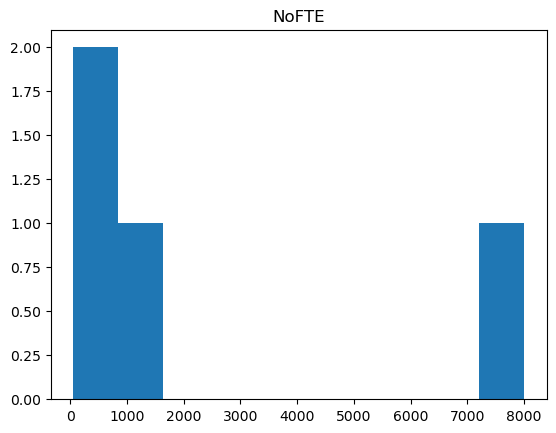

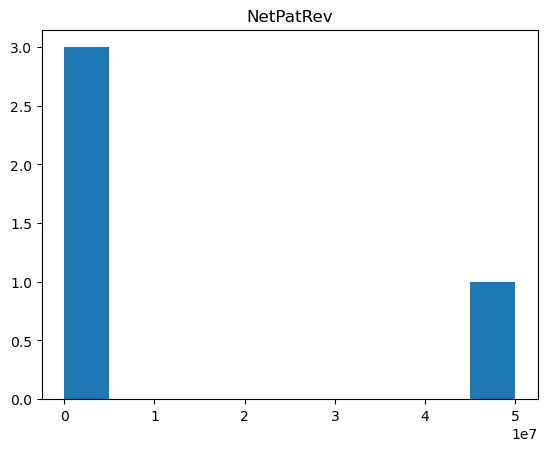

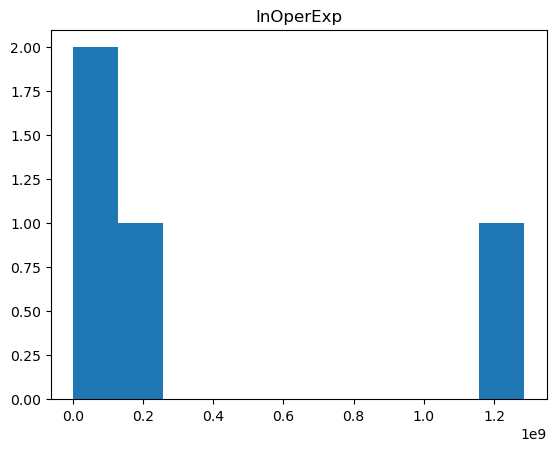

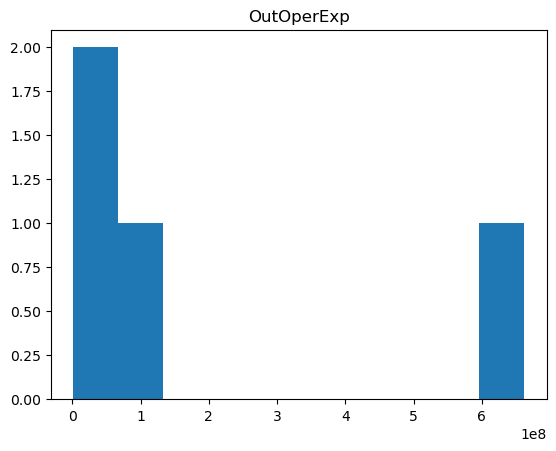

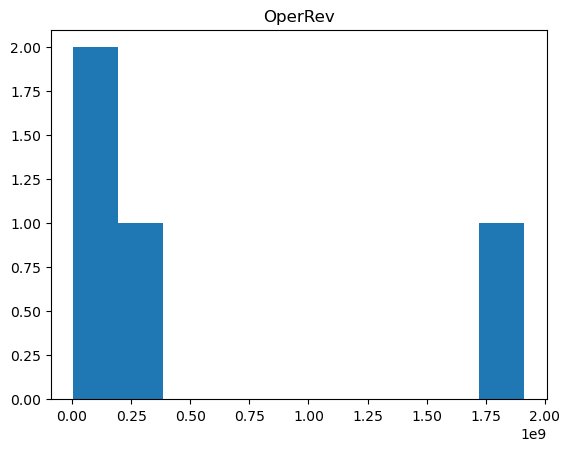

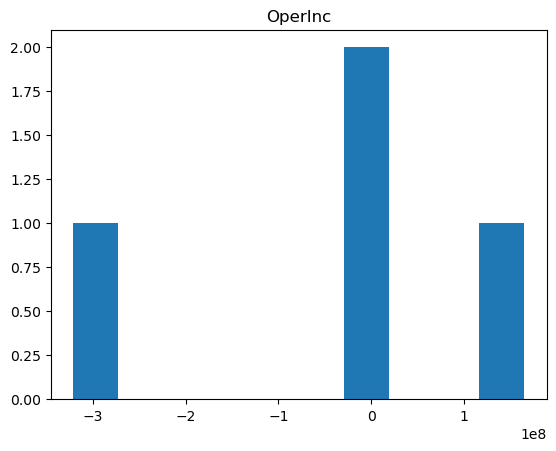

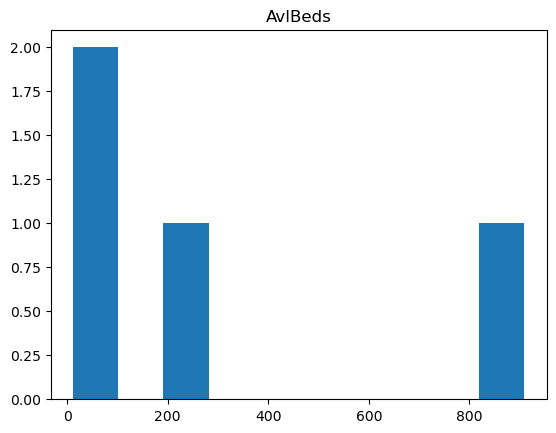

In [22]:
import matplotlib.pyplot as plt

for col in ['NoFTE', 'NetPatRev', 'InOperExp', 'OutOperExp', 'OperRev', 'OperInc', 'AvlBeds']:
    plt.hist(numerical_statistical_summary[col].dropna(), bins=10)
    plt.title(col)
    plt.show()



### Create scatterplots of the following variables using *net patient revenue* as the target variable (i.e., place it on the *y*-axis): `NoFTE`, `InOperExp`, `OutOperExp`, `OperRev`, `OperInc`, and `AvlBeds`.

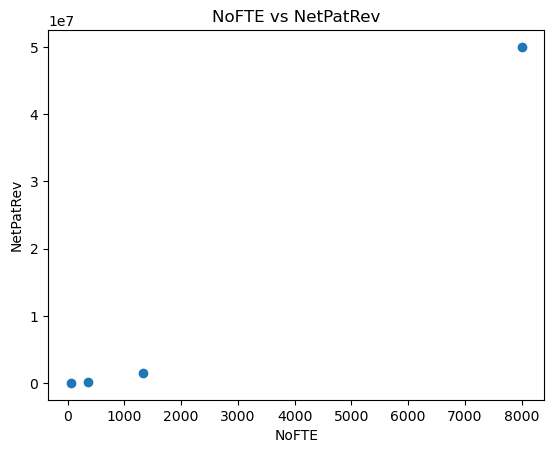

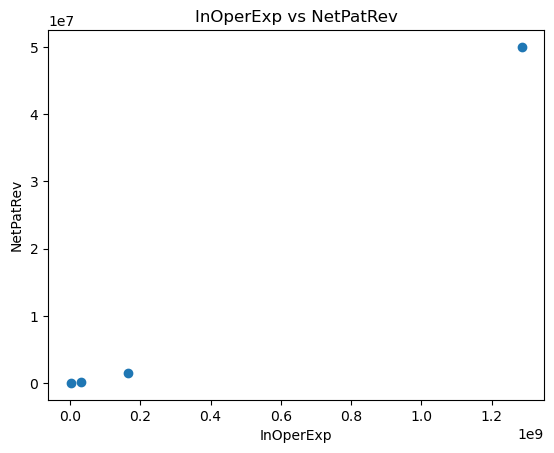

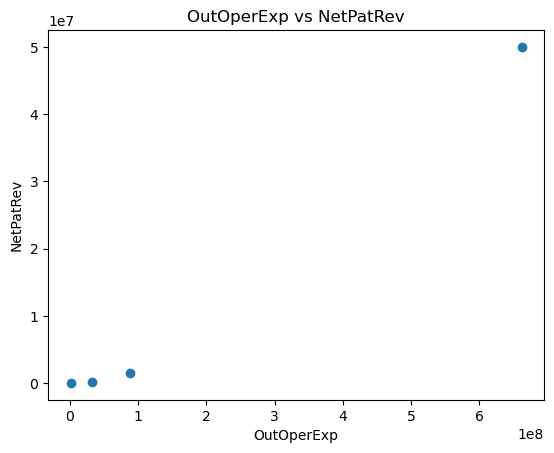

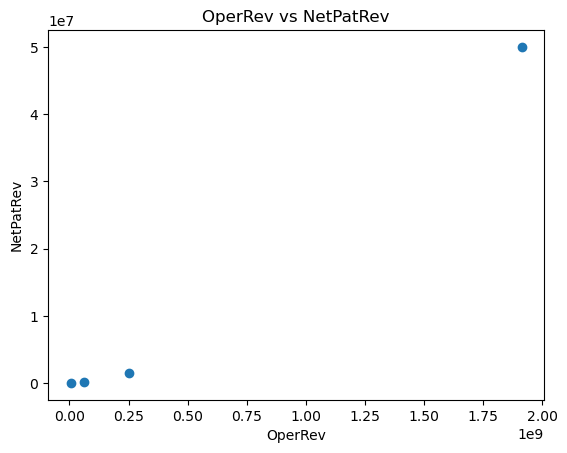

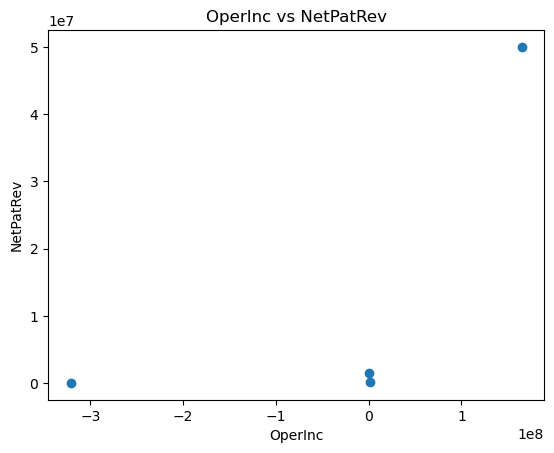

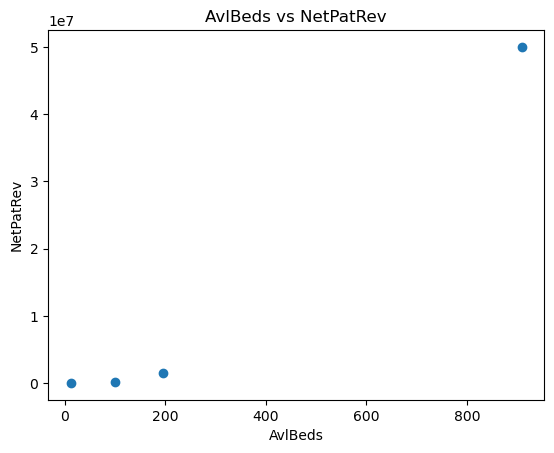

In [23]:
for col in ['NoFTE', 'InOperExp', 'OutOperExp', 'OperRev', 'OperInc', 'AvlBeds']:
    plt.scatter(numerical_statistical_summary[col], numerical_statistical_summary['NetPatRev'])
    plt.xlabel(col)
    plt.ylabel('NetPatRev')
    plt.title(f'{col} vs NetPatRev')
    plt.show()


The scatter plots reveal that initially, increasing resources (such as staff or beds) has little impact on revenue. However, after reaching a certain threshold, even small additions to resources cause a significant rise in revenue.